<a href="https://colab.research.google.com/github/nrvanwyck/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

## What is descriptive statistics?

In [0]:
import pandas as pd

df = pd.DataFrame({'a':[1,2,3,4,5,6,7,8], 'b':[10,4,8,30,35,70,12,6]})
df.head()

,a,b
0,1,10
1,2,4
2,3,8
3,4,30
4,5,35


In [0]:
df.describe()

,a,b
count,8.00000,8.000000
mean,4.50000,21.875000
std,2.44949,22.541628
min,1.00000,4.000000
25%,2.75000,7.500000
50%,4.50000,11.000000
75%,6.25000,31.250000
max,8.00000,70.000000


## Measures of Center
- Mean
- Median
- Mode

## Measures of Spread
- Variance: Average Squared Distance from the Mean
- Standard Deviation: Square Root of the variance - The variance put back into the same units as the mean - Aerage Distance from the mean

## Variance 

![Variance Equation](https://standard-deviation-calculator.com/wp-content/uploads/2018/03/sample-variance-formula-descriptive-statistics-54-638-cb1374419364.jpg)

## Standard Deviation
$\text{Standard Deviation} = \sqrt{\text{variance}} = \sigma$

## What is Inferential Statistics?

![Inferential Statistics](https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg)

## The Statistics of Pancakes

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [0]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [0]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

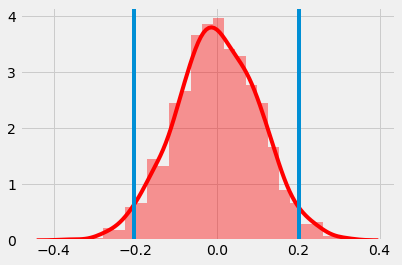

In [0]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

# Normal and Standard Normal Curves

![Normal and Standard Curves](https://calcworkshop.com/wp-content/uploads/standard-normal-distribution-curve.png)

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

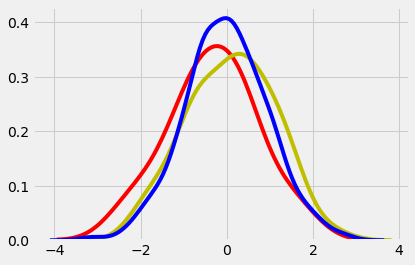

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: 0.4413930990623854
Standard Deviation: 0.6941374780241226
Variance: 0.48182683839768925
t - distribution with 100 degrees of freedom
------------------------------
Mean: 0.02368152792716244
Standard Deviation: 1.0667031053578768
Variance: 1.1378555149801377
t - distribution with 1000 degrees of freedom
------------------------------
Mean: -0.02714833195673186
Standard Deviation: 1.007294480703253
Variance: 1.014642170855236


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

# Pancake Experiment

Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively.

In [0]:
mu1 = 180 # mean
sigma1 = 5 # standard deviation
sample1 = np.random.normal(mu1, sigma1, 1000)

mu2 = 178.5 # mean
sigma2 = 4.25 # standard deviation
sample2 = np.random.normal(mu2, sigma2, 800)

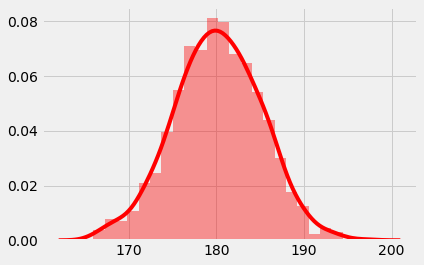

In [0]:
ax = sns.distplot(sample1, color='r')
# ax.axvline(np.percentile(sample,97.5),0)
# ax.axvline(np.percentile(sample,2.5),0)

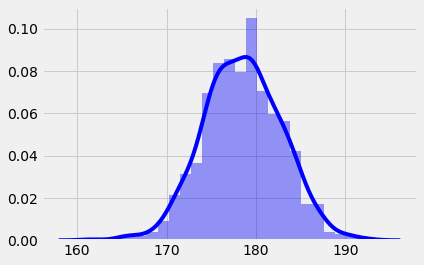

In [0]:
ax = sns.distplot(sample2, color='b')

In [0]:
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=7.386682632101076, pvalue=2.2924679385113437e-13)

## Parts of a T-test

- Null Hypothesis (the boring hypothesis): The two means are the same, differences are due to randomness
- Alternative Hypothesis: The means are not the same, the differences are due to some underlying cause
- T-statistic: ![T-Statistic](https://www.ahajournals.org/cms/attachment/850f8023-e028-4694-a946-bbdbdaa9009b/15mm6.jpg)
- P-value: The probability of us observing a given t-statistic due to random chance

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!

import pandas as pd

In [0]:
from google.colab.import files
files.upload()

# in class we uploaded a cleaned version of the voting data we'll be using

In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

# 1-sample t-test example

In a 1-sample T-test we are testing the mean of one sample against a **null hypothesis of our choosing.**

The null hypothesis that we designate depends on how we have encoded our data and the kind of questions that we want to test.

If I have encoded votes as 0 for no and 1 for yes, I want to test Democratic support for an issue, and I use a null hypothesis of 0, then I am comparing Democrat voting support against a null hypothesis of no Democrat support at all for a given issue.

If I use a null hypothesis of .5 then I am comparing the democrat voting support against a null hypothesis of democrats being neither in favor or against a particular issue.

If I use a null hypothesis of 1 then I am comparing the democrat voting support against a null hypothesis of all democrats being favor of a particular issue.

Lets use the 0 and .5 null-hypotheses to test the significance of those particular claims. They're all valid questions to be asking, they're just posing a slightly different question --testing something different.

In [0]:
dem['handicapped-infants'].value_counts()

In [0]:
dem['handicapped-infants'].isnull().sum()

In [0]:
from scipy.stats import ttest_1samp
ttest_1samp(dem['handicapped-infants'], .5, nan_policy='omit')

Null Hypothess: .5 - there is 50-50 Democratic support for this bill in Congress
Alternative Hypothesis: That there is non-50-50 Democratic support for this bill in Congress
P-Value Threshold (confidence level) 95% confidence level (.05 p-value threshold)

Given the results of the above test I would REJECT the null hypothesis that Democratic support for the handicapped-infants bill is 50-50 (split vote amongst Dems)

In [0]:
# 2-sample t-test (for means) example
print("Democratic Support: ", dem['south-africa'].mean())
print("Republican Support: ", rep['south-africa'].mean())

In [0]:
ttest_ind(dem['south-africa'], rep['south-africa'], nan_policy='omit')

- Null Hypothesis: The mean of Dem support == The mean of Rep support. (These two parties support this bill at the same level.)
- Alternative Hypothesis: The means are different (not the same level of support)

T-statistic goes up; p-value goes down (inversely correlated)

Given the results of the above test, I would REJECT the null-hypothesis that Democratic support for the handicapped-infants bill is 50-50 (split vote amongst dems) at the 95% significance level. (Note: opposite result would be that we FAIL TO REJECT the null-hypothesis; we're never testing whether we should ACCEPT the null-hypothesis)

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means